In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 

pd.options.display.max_columns = 500

In [183]:
file_path = 'cybersecurity_attacks.csv'
df = pd.read_csv(file_path)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [150]:
df.describe(include="all")

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000.000000,40000.000000,40000,40000.000000,40000,40000,40000,20000,40000.000000,19933,40000,40000,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,NaN,NaN,3,NaN,2,3,40000,1,NaN,1,3,2,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,NaN,NaN,ICMP,NaN,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,NaN,Alert Triggered,DDoS,Known Pattern A,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,NaN,NaN,13429,NaN,20237,13376,1,20000,NaN,19933,13428,20076,13529,13435,6,35,13408,16,2,20039,19950,20116
mean,NaN,NaN,NaN,32970.356450,33150.868650,NaN,781.452725,NaN,NaN,NaN,NaN,50.113473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,18560.425604,18574.668842,NaN,416.044192,NaN,NaN,NaN,NaN,28.853598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1027.000000,1024.000000,NaN,64.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,16850.750000,17094.750000,NaN,420.000000,NaN,NaN,NaN,NaN,25.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,32856.000000,33004.500000,NaN,782.000000,NaN,NaN,NaN,NaN,50.345000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,48928.250000,49287.000000,NaN,1143.000000,NaN,NaN,NaN,NaN,75.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
raw_df = df.copy()

# Working with non-numeric columns

In [152]:
# Count the unique values of all non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns
print(df[non_numeric_cols].nunique())

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Protocol                      3
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64


### The following columns should be drop due to high-cardinality (too many unique values)
- Source IP Address
- Destination IP Address
- Payload Data 
- User Information
- Device Information

### These columns will be kept since it could potentially provide useful information
- Timestamp
- Geo-location Data

In [153]:
df[["Source IP Address", "Destination IP Address", "Payload Data", "User Information"]]

,Source IP Address,Destination IP Address,Payload Data,User Information
0,103.216.15.12,84.9.164.252,Qui natus odio asperiores nam. Optio nobis ius...,Reyansh Dugal
1,78.199.217.198,66.191.137.154,Aperiam quos modi officiis veritatis rem. Omni...,Sumer Rana
2,63.79.210.48,198.219.82.17,Perferendis sapiente vitae soluta. Hic delectu...,Himmat Karpe
3,163.42.196.10,101.228.192.255,Totam maxime beatae expedita explicabo porro l...,Fateh Kibe
4,71.166.185.76,189.243.174.238,Odit nesciunt dolorem nisi iste iusto. Animi v...,Dhanush Chad
...,...,...,...,...
39995,26.36.109.26,121.100.75.240,Quibusdam ullam consequatur consequuntur accus...,Adira Madan
39996,17.21.163.81,196.108.134.78,Quaerat neque esse. Animi expedita natus commo...,Rati Dara
39997,162.35.217.57,98.107.0.15,Enim at aspernatur illum. Saepe numquam eligen...,Samiha Joshi
39998,208.72.233.205,173.79.112.252,Officiis dolorem sed harum provident earum dis...,Rasha Chauhan


In [154]:
raw_df = raw_df.drop(columns=["Source IP Address", "Destination IP Address", "Payload Data", "User Information"])

In [155]:
# Convert to Timestamp column into Date and Time columns
raw_df['Timestamp'] = pd.to_datetime(raw_df['Timestamp'])

# Create separate columns
raw_df['hour'] = raw_df['Timestamp'].dt.hour
raw_df['day'] = raw_df['Timestamp'].dt.day
raw_df['year'] = raw_df['Timestamp'].dt.year
raw_df['week_day'] = raw_df['Timestamp'].dt.weekday
raw_df['month'] = raw_df['Timestamp'].dt.month
raw_df[['Timestamp', 'hour', 'day', 'week_day','month','year']].head()

,Timestamp,hour,day,week_day,month,year
0,2023-05-30 06:33:58,6,30,1,5,2023
1,2020-08-26 07:08:30,7,26,2,8,2020
2,2022-11-13 08:23:25,8,13,6,11,2022
3,2023-07-02 10:38:46,10,2,6,7,2023
4,2023-07-16 13:11:07,13,16,6,7,2023


In [156]:
raw_df = raw_df.drop(columns=['Timestamp', 'year'])

## Changing dataypes of the columns

In [157]:
catergorical_cols = ['Source Port', 'Destination Port']
raw_df[catergorical_cols] = raw_df[catergorical_cols].astype('object')

## Check co-linearlity of new columns in the dataset

<Axes: >

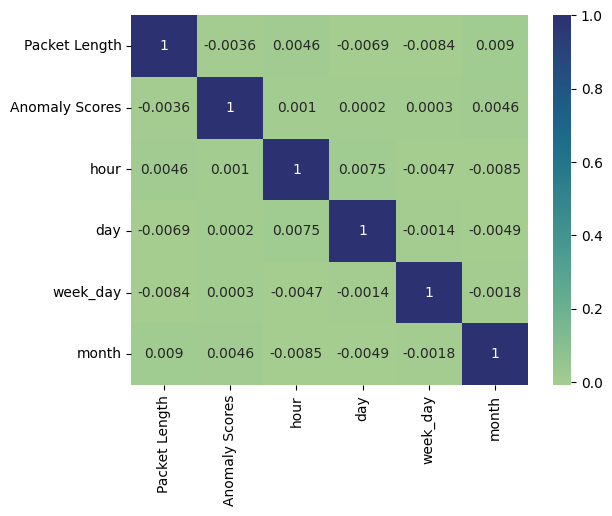

In [158]:
sns.heatmap(raw_df.select_dtypes(['int64', 'float64', 'int32']).corr(), cmap="crest", annot=True)

In [159]:
# Split Geo-location Data column into City and State
raw_df[['City', 'State']] = df['Geo-location Data'].str.split(',', n=1, expand=True)
raw_df['City'] = raw_df['City'].str.strip()
raw_df['State'] = raw_df['State'].str.strip()

raw_df = raw_df.drop(columns='Geo-location Data')

In [160]:
raw_df.head()

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Device Information,Network Segment,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,hour,day,week_day,month,City,State
0,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,150.9.97.135,Log Data,NaN,Server,6,30,1,5,Jamshedpur,Sikkim
1,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,NaN,Log Data,NaN,Firewall,7,26,2,8,Bilaspur,Nagaland
2,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,114.133.48.179,Log Data,Alert Data,Firewall,8,13,6,11,Bokaro,Rajasthan
3,20018,32534,UDP,385,Data,HTTP,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,NaN,NaN,Alert Data,Firewall,10,2,6,7,Jaunpur,Rajasthan
4,6131,26646,TCP,1462,Data,DNS,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,149.6.110.119,NaN,Alert Data,Firewall,13,16,6,7,Anantapur,Tripura


- State column has low-cardinality => could be kept to perform encode later on
- City column still possess a high-cardinality => drop

In [161]:
raw_df = raw_df.drop(columns=['City', 'State'])

In [162]:
raw_df.head()

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Device Information,Network Segment,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,hour,day,week_day,month
0,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,150.9.97.135,Log Data,NaN,Server,6,30,1,5
1,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,NaN,Log Data,NaN,Firewall,7,26,2,8
2,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,114.133.48.179,Log Data,Alert Data,Firewall,8,13,6,11
3,20018,32534,UDP,385,Data,HTTP,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,NaN,NaN,Alert Data,Firewall,10,2,6,7
4,6131,26646,TCP,1462,Data,DNS,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,149.6.110.119,NaN,Alert Data,Firewall,13,16,6,7


# Working with null-existing columns

In [163]:
raw_df.isnull().sum()

Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Malware Indicators    20000
Anomaly Scores            0
Alerts/Warnings       20067
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
Device Information        0
Network Segment           0
Proxy Information     19851
Firewall Logs         19961
IDS/IPS Alerts        20050
Log Source                0
hour                      0
day                       0
week_day                  0
month                     0
dtype: int64

In [164]:
print(f"Malware Indicators: {raw_df['Malware Indicators'].value_counts()}")
print(f"Alerts/Warnings: {raw_df['Alerts/Warnings'].value_counts()}")
print(f"Proxy Information: {raw_df['Proxy Information'].value_counts()}")
print(f"Firewall Logs: {raw_df['Firewall Logs'].value_counts()}")
print(f"IDS/IPS Alerts: {raw_df['IDS/IPS Alerts'].value_counts()}")

Malware Indicators: Malware Indicators
IoC Detected    20000
Name: count, dtype: int64
Alerts/Warnings: Alerts/Warnings
Alert Triggered    19933
Name: count, dtype: int64
Proxy Information: Proxy Information
39.123.165.122     2
150.9.97.135       1
198.80.71.196      1
108.143.243.168    1
211.195.173.251    1
                  ..
205.112.169.158    1
78.192.52.63       1
157.191.153.187    1
205.183.87.116     1
112.169.115.139    1
Name: count, Length: 20148, dtype: int64
Firewall Logs: Firewall Logs
Log Data    20039
Name: count, dtype: int64
IDS/IPS Alerts: IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64


==> Apply Binary encoding for all columns with only 1 unique values

In [165]:
# Checking the correlation between Malware Indicators and Firewall Logs columns
check = raw_df[raw_df['Malware Indicators'].notna()]['Firewall Logs'] == 'Log Data'
print(f"Perfect match: {check.all()}, Percentage: {check.mean() * 100:.2f}%")

Perfect match: False, Percentage: 50.13%


In [166]:
# Apply Binary encoding
raw_df['Malware Indicators'] = raw_df['Malware Indicators'].notna().astype(int)
raw_df['Alerts/Warnings'] = raw_df['Alerts/Warnings'].notna().astype(int)
raw_df['Firewall Logs'] = raw_df['Firewall Logs'].notna().astype(int)
raw_df['IDS/IPS Alerts'] = raw_df['IDS/IPS Alerts'].notna().astype(int)

- Check if Proxy presence correlates with Attack Type

In [167]:
# Create a binary indicator for proxy presence
raw_df['Has_Proxy'] = raw_df['Proxy Information'].notna().astype(int)

# Check distribution of attacks with/without proxy
print("Attack distribution by Proxy presence:")
crosstab = pd.crosstab(raw_df['Has_Proxy'], raw_df['Attack Type'], normalize='index') * 100
print(crosstab)

Attack distribution by Proxy presence:
Attack Type       DDoS  Intrusion    Malware
Has_Proxy                                   
0            33.464309  33.590247  32.945444
1            33.674128  32.741079  33.584793


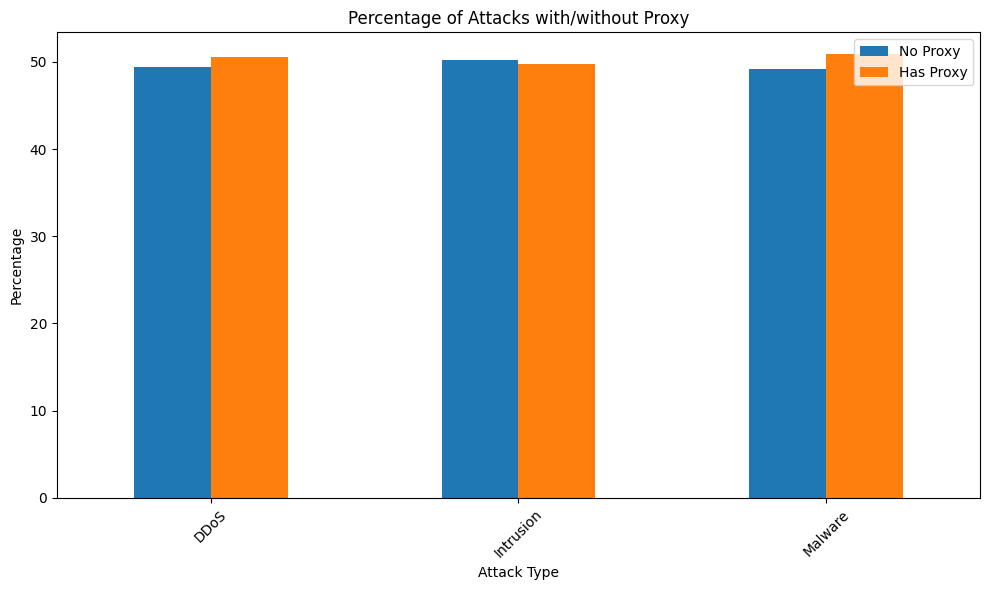

In [168]:
# Grouped bar chart
attack_proxy = pd.crosstab(raw_df['Attack Type'], raw_df['Has_Proxy'], normalize='index') * 100
attack_proxy.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Attacks with/without Proxy')
plt.xlabel('Attack Type')
plt.ylabel('Percentage')
plt.legend(['No Proxy', 'Has Proxy'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Distribution are nearly identical across all attack types => Drop the Proxy Information column*

In [169]:
raw_df = raw_df.drop(columns=['Has_Proxy', 'Proxy Information'])

In [170]:
raw_df.head()

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Device Information,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source,hour,day,week_day,month
0,31225,17616,ICMP,503,Data,HTTP,1,28.67,0,Malware,Known Pattern B,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,1,0,Server,6,30,1,5
1,17245,48166,ICMP,1174,Data,HTTP,1,51.50,0,Malware,Known Pattern A,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,1,0,Firewall,7,26,2,8
2,16811,53600,UDP,306,Control,HTTP,1,87.42,1,DDoS,Known Pattern B,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,1,1,Firewall,8,13,6,11
3,20018,32534,UDP,385,Data,HTTP,0,15.79,1,Malware,Known Pattern B,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,0,1,Firewall,10,2,6,7
4,6131,26646,TCP,1462,Data,DNS,0,0.52,1,DDoS,Known Pattern B,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,0,1,Firewall,13,16,6,7


## Adding new columns

In [ ]:
raw_df['Device Information'].value_counts()

Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)                                                                                       35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)                                                                                           34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)                                                                                           33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)                                                                                       31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)                                                                                       31
                                                                                                                                                      ..
Mozilla/5.0 (Macintosh; PPC Mac OS X 10_9_2; rv:1.9.2.20) Gecko

In [ ]:
raw_df['Browser'] = raw_df['Device Information'].str.split('/').str[0]
raw_df['Browser']

0        Mozilla
1        Mozilla
2        Mozilla
3        Mozilla
4        Mozilla
          ...   
39995    Mozilla
39996    Mozilla
39997    Mozilla
39998    Mozilla
39999    Mozilla
Name: Browser, Length: 40000, dtype: object

In [ ]:
import re
# OS and device patterns to search for
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  # re.I makes the search case-insensitive
        if match:
            return match.group()
    return 'Unknown'  # Return 'Unknown' if no patterns match

# Extract device or OS
raw_df['Device/OS'] = raw_df['Device Information'].apply(extract_device_or_os)

In [191]:
import pandas as pd
from user_agents import parse

def parse_ua(ua_string):
    ua = parse(ua_string)
    return pd.Series({
        "browser_version": ua.browser.version_string,
        "os_version": ua.os.version_string,
        "device_type": (
            "Mobile" if ua.is_mobile else
            "Tablet" if ua.is_tablet else
            "PC" if ua.is_pc else
            "Bot" if ua.is_bot else
            "Other"
        )
    })

# Apply to dataframe
features_df = raw_df["Device Information"].apply(parse_ua)

raw_df = pd.concat([raw_df, features_df], axis=1)



In [193]:
raw_df = raw_df.drop('Device Information', axis = 1)

In [194]:
raw_df.head()

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source,hour,day,week_day,month,Browser,Device/OS,browser_version,os_version,device_type
0,31225,17616,ICMP,503,Data,HTTP,1,28.67,0,Malware,Known Pattern B,Logged,Low,Segment A,1,0,Server,6,30,1,5,Mozilla,Windows,9.0,8,PC
1,17245,48166,ICMP,1174,Data,HTTP,1,51.50,0,Malware,Known Pattern A,Blocked,Low,Segment B,1,0,Firewall,7,26,2,8,Mozilla,Windows,8.0,Vista,PC
2,16811,53600,UDP,306,Control,HTTP,1,87.42,1,DDoS,Known Pattern B,Ignored,Low,Segment C,1,1,Firewall,8,13,6,11,Mozilla,Windows,9.0,8,PC
3,20018,32534,UDP,385,Data,HTTP,0,15.79,1,Malware,Known Pattern B,Blocked,Medium,Segment B,0,1,Firewall,10,2,6,7,Mozilla,Macintosh,11.0,10.11.5,PC
4,6131,26646,TCP,1462,Data,DNS,0,0.52,1,DDoS,Known Pattern B,Blocked,Low,Segment C,0,1,Firewall,13,16,6,7,Mozilla,Windows,5.0,8,PC


In [204]:
for col in ['Browser','Device/OS', 'browser_version', 'os_version', 'device_type']:
    print(raw_df[col].unique())
    print(raw_df[val].isnull().sum())

['Mozilla' 'Opera']
0
['Windows' 'Macintosh' 'Linux' 'iPod' 'iPhone' 'iPad' 'Android']
0
['9.0' '8.0' '11.0' ... '29.0.888' '23.0.880' '38.0.843']
0
['8' 'Vista' '10.11.5' '' '10.7.6' '10.5.8' '4.3' '10' '7' '12.4.8'
 '10.11.1' '2000' '95' 'XP' 'ME' '3.1.3' '10.12.0' '7.1.2' '7.1' '5.1.1'
 '1.0' '4.2.1' '3.0' 'CE' '4.4' '10.12.5' '3.3' '98' '10.6.2' '4.0' '3.2'
 '6.0' '10.11.9' '10.5.0' '10.7.2' '3.1' '10.8.8' '14.2.1' '4.1.1'
 '10.7.1' '9.3.5' '10.8.6' '10.3.4' '10.6.4' '4.3.1' '4.0.3' '4.2' '6.1.6'
 '10.6.5' '10.5.2' '10.8.9' 'NT' '10.12.4' '10.5.3' '10.11.8' '10.9.5'
 '8.1.0' '10.11.4' '2.2.2' '10.6.8' '10.5.9' '10.9.0' '7.0' '10.11.0'
 '10.12.1' '9.3.6' '10.7.4' '14.2' '5.0.1' '10.6.6' '2.3.3' '3.2.1'
 '4.4.2' '8.0.0' '10.11.6' '4.1' '10.11.2' '10.9.3' '10.9.9' '1.1'
 '10.10.3' '10.7.0' '10.10.0' '2.3.7' '3.2.4' '4.1.2' '4.2.2' '10.5.1'
 '1.5' '2.3.4' '10.12.6' '2.2.1' '10.3.3' '10.6.1' '10.7.9' '2.3.5'
 '10.8.3' '3.2.2' '10.6.3' '10.8.7' '10.12.7' '10.8.0' '10.10.1' '2.3.1'
 '10.1

In [208]:
raw_df['browser_version'] = (raw_df['browser_version']
    .astype(str)
    .str.split('.', n=1)
    .str[0]
    .astype('Int64')  # nullable int
)


In [218]:
raw_df['browser_version'].unique()

<IntegerArray>
[ 9,  8, 11,  5, 45, 38,  4,  7,  3, 46, 18, 61, 10, 22, 16, 14, 51, 20, 30,
 58, 28, 54, 62, 39, 36,  6, 12, 17, 48, 64, 29, 66, 13, 26, 55, 43, 35, 34,
 37, 50, 31, 47, 32, 15, 56, 49, 40, 23, 42, 41, 53, 57, 25, 44, 68, 63, 24,
 27, 19, 59, 67, 33, 21, 60, 52, 65]
Length: 66, dtype: Int64

In [213]:
raw_df['os_version'] = (
    raw_df['os_version']
    .replace('', 'Unknown')                
    .astype(str)
    .str.split('.', n=1)
    .str[0]
)

In [231]:
modern_os = ['10', '11', '8', 'Vista', '7']
old_os = ['XP', '2000', 'ME']
ancient_os = ['98', '95', 'NT', 'CE']

raw_df['os_age_category'] = 'Unknown'
raw_df.loc[raw_df['os_version'].isin(modern_os), 'os_age_category'] = 'Modern'
raw_df.loc[raw_df['os_version'].isin(old_os), 'os_age_category'] = 'Old'
raw_df.loc[raw_df['os_version'].isin(ancient_os), 'os_age_category'] = 'Ancient'

dict_map = {'Modern': 2, 'Old': 1, 'Ancient': 0, 'Unknown': 0}
raw_df['os_age_category'] = raw_df['os_age_category'].map(dict_map)

In [234]:
raw_df['os_age_category'].dtype

dtype('int64')

In [237]:
raw_df['device_type'].value_counts()

device_type
PC        26762
Mobile     9471
Other      2778
Tablet      989
Name: count, dtype: int64

In [235]:
raw_df.head()

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source,hour,day,week_day,month,Browser,Device/OS,browser_version,os_version,device_type,os_age_category
0,31225,17616,ICMP,503,Data,HTTP,1,28.67,0,Malware,Known Pattern B,Logged,Low,Segment A,1,0,Server,6,30,1,5,Mozilla,Windows,9,8,PC,2
1,17245,48166,ICMP,1174,Data,HTTP,1,51.50,0,Malware,Known Pattern A,Blocked,Low,Segment B,1,0,Firewall,7,26,2,8,Mozilla,Windows,8,Vista,PC,2
2,16811,53600,UDP,306,Control,HTTP,1,87.42,1,DDoS,Known Pattern B,Ignored,Low,Segment C,1,1,Firewall,8,13,6,11,Mozilla,Windows,9,8,PC,2
3,20018,32534,UDP,385,Data,HTTP,0,15.79,1,Malware,Known Pattern B,Blocked,Medium,Segment B,0,1,Firewall,10,2,6,7,Mozilla,Macintosh,11,10,PC,2
4,6131,26646,TCP,1462,Data,DNS,0,0.52,1,DDoS,Known Pattern B,Blocked,Low,Segment C,0,1,Firewall,13,16,6,7,Mozilla,Windows,5,8,PC,2


<Axes: xlabel='Packet Length', ylabel='Count'>

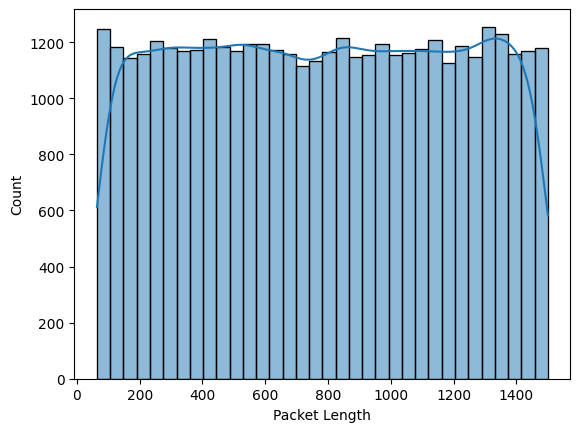

In [304]:
sns.histplot(raw_df['Packet Length'], kde=True)

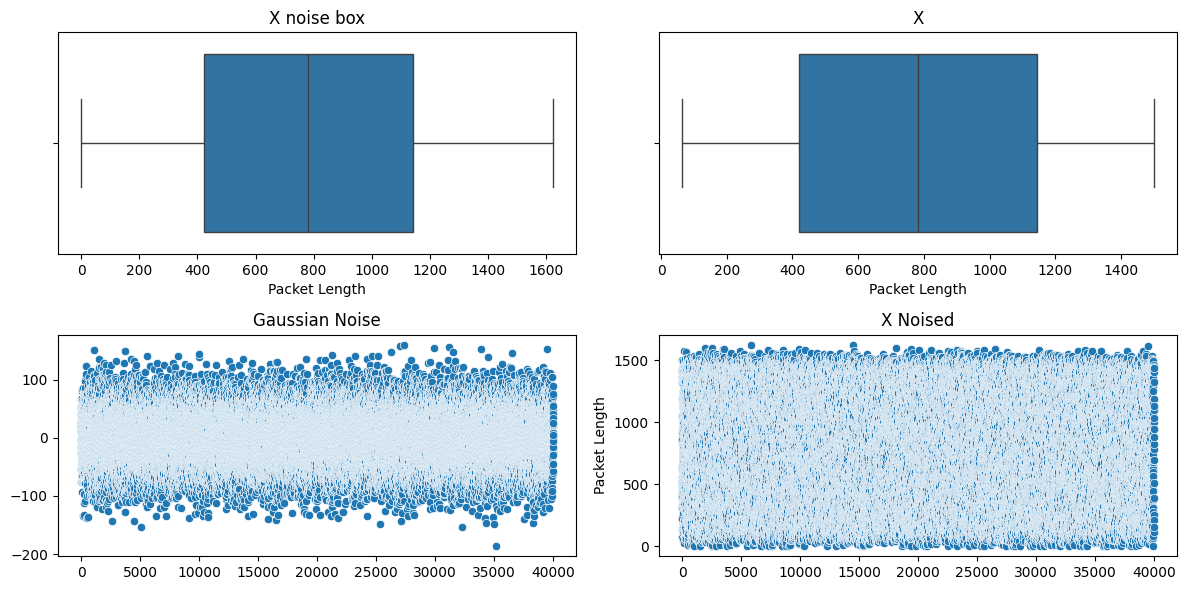

In [333]:
from numpy import mean, std

x = pd.Series(raw_df['Packet Length'])
# y = 0.01*x + 0.3    # Parameters are arbitrary.
# gaussian_noise = np.random.normal(mean(x), std(x), len(x))
noise_level = 0.10 # 5% noise - adjust this
gaussian_noise = np.random.normal(0, noise_level * x.std(), len(x))
x_noised = x + gaussian_noise
x_noised = np.maximum(x_noised, 0)
x_noised = np.round(x_noised).astype(int)

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2,2, figsize=(12, 6))

# sns.scatterplot(x, ax=axes[0, 0])
# axes[0, 0].set_title("X")

sns.boxplot(x=x_noised, ax=axes[0,0])
axes[0,0].set_title("X noise box")
sns.boxplot(x=x, ax=axes[0,1])
axes[0,1].set_title("X")

sns.scatterplot(gaussian_noise, ax= axes[1, 0])
axes[1, 0].set_title("Gaussian Noise")

sns.scatterplot(x_noised, ax=axes[1,1])
axes[1,1].set_title("X Noised")

# Adjust layout
plt.tight_layout()
plt.show()

In [336]:
x_noised = pd.Series(x_noised).to_list()
raw_df['x_noised'] = x_noised

Text(0.5, 1.0, 'X noise')

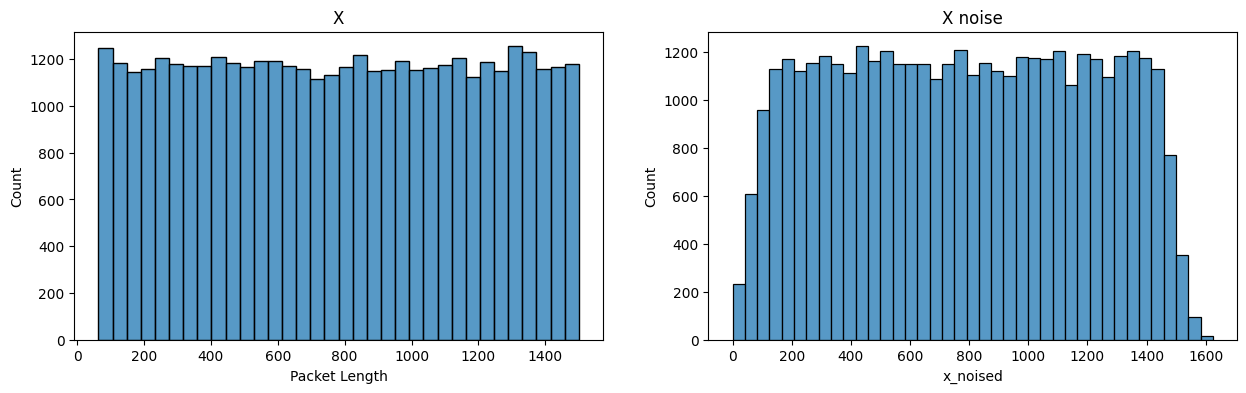

In [357]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(1,2, figsize=(15, 4))

sns.histplot(x=raw_df['Packet Length'], ax=axes[0])
axes[0].set_title("X")

sns.histplot(x=raw_df['x_noised'], ax=axes[1])
axes[1].set_title("X noise")

In [374]:
# x = pd.Series(raw_df['Anomaly Scores'])
# # y = 0.01*x + 0.3    # Parameters are arbitrary.
# # gaussian_noise = np.random.normal(mean(x), std(x), len(x))
# noise_level = 0.05 # 5% noise - adjust this
# gaussian_noise = np.random.normal(0, noise_level * x.std(), len(x))
# x_noised = x + gaussian_noise
# x_noised = np.maximum(x_noised, 0)
# x_noised = np.round(x_noised).astype(int)

# # Create a 2x2 subplot grid
# fig, axes = plt.subplots(2,2, figsize=(12, 6))

# sns.histplot(x, ax=axes[0, 0], kde=True)
# axes[0, 0].set_title("X")

# sns.histplot(gaussian_noise, ax= axes[0,1])
# axes[0,1].set_title("Gaussian Noise")

# # sns.boxplot(x=x, ax=axes[0,1])
# # axes[0,1].set_title("X")

# sns.boxplot(x=x_noised, ax=axes[1,0])
# axes[1,0].set_title("X noise box")

# sns.histplot(x_noised, ax=axes[1,1], kde=True)
# axes[1,1].set_title("X Noised")

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [375]:
# x_noised = pd.Series(x_noised).to_list()
# raw_df['score_noised'] = x_noised

<Axes: >

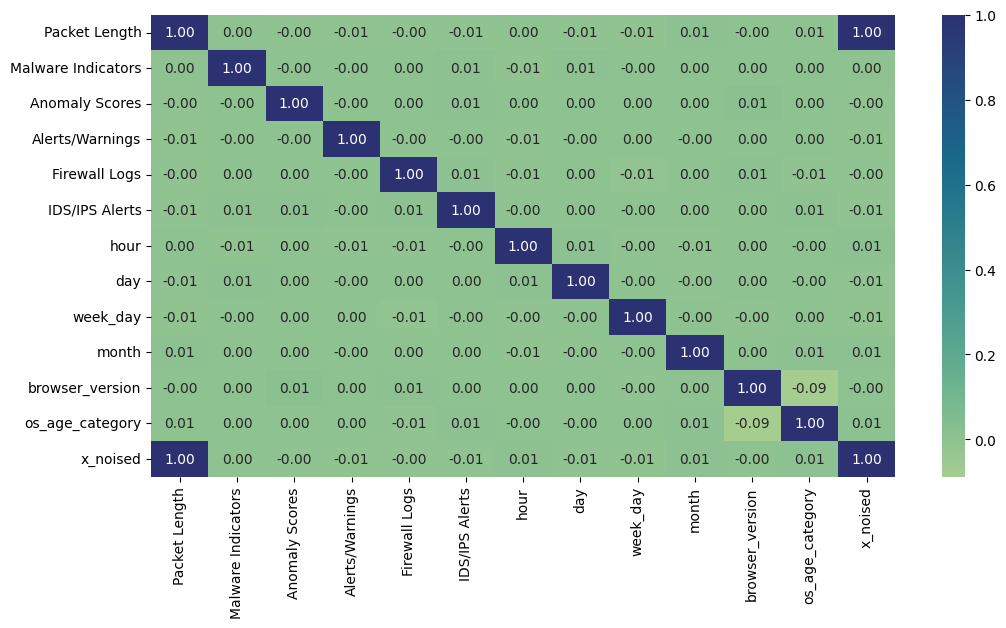

In [376]:
plt.figure(figsize=(12,6))
sns.heatmap(raw_df.select_dtypes(['int64', 'float64', 'int32']).corr(), cmap="crest", annot=True, fmt='.2f')

In [373]:
raw_df.head()

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source,hour,day,week_day,month,Browser,Device/OS,browser_version,os_version,device_type,os_age_category,x_noised
0,31225,17616,ICMP,503,Data,HTTP,1,28.67,0,Malware,Known Pattern B,Logged,Low,Segment A,1,0,Server,6,30,1,5,Mozilla,Windows,9,8,PC,2,557
1,17245,48166,ICMP,1174,Data,HTTP,1,51.50,0,Malware,Known Pattern A,Blocked,Low,Segment B,1,0,Firewall,7,26,2,8,Mozilla,Windows,8,Vista,PC,2,1186
2,16811,53600,UDP,306,Control,HTTP,1,87.42,1,DDoS,Known Pattern B,Ignored,Low,Segment C,1,1,Firewall,8,13,6,11,Mozilla,Windows,9,8,PC,2,327
3,20018,32534,UDP,385,Data,HTTP,0,15.79,1,Malware,Known Pattern B,Blocked,Medium,Segment B,0,1,Firewall,10,2,6,7,Mozilla,Macintosh,11,10,PC,2,452
4,6131,26646,TCP,1462,Data,DNS,0,0.52,1,DDoS,Known Pattern B,Blocked,Low,Segment C,0,1,Firewall,13,16,6,7,Mozilla,Windows,5,8,PC,2,1408


## Renaming the columns

In [388]:
# Define new column names
column_mapping = {
    'Source Port': 'source_port',
    'Destination Port': 'destination_port',
    'Protocol': 'protocol',
    'Packet Length': 'packet_length',
    'Packet Type': 'packet_type',
    'Traffic Type': 'traffic_type',
    'Malware Indicators': 'malware_indicators',
    'Anomaly Scores': 'anomaly_scores',
    'Alerts/Warnings': 'alerts_warnings',
    'Attack Type': 'attack_type',
    'Attack Signature': 'attack_signature',
    'Action Taken': 'action_taken',
    'Severity Level': 'severity_level',
    'Network Segment': 'network_segment',
    'Firewall Logs': 'firewall_logs',
    'IDS/IPS Alerts': 'ids_ips_alerts',
    'Log Source': 'log_source',
    'hour': 'hour',
    'day': 'day',
    'week_day': 'week_day',
    'month': 'month',
    'Browser': 'browser',
    'Device/OS': 'device_os',
    'browser_version': 'browser_version',
    'os_version': 'os_version',
    'device_type': 'device_type',
    'os_age_category': 'os_age_category',
    'x_noised': 'packet_length_noised'  
}

# Rename columns
raw_df.rename(columns=column_mapping, inplace=True)

# Working with Object-type columns

In [389]:
raw_df.dtypes

source_port              object
destination_port         object
protocol                 object
packet_length             int64
packet_type               int64
traffic_type             object
malware_indicators        int64
anomaly_scores          float64
alerts_warnings           int64
attack_type              object
attack_signature          int64
action_taken             object
severity_level           object
network_segment          object
firewall_logs             int64
ids_ips_alerts            int64
log_source                int64
hour                      int32
day                       int32
week_day                  int32
month                     int32
browser                   int64
device_os                object
browser_version           Int64
os_version               object
device_type              object
os_age_category           int64
packet_length_noised      int64
dtype: object

### Checking count & unique values

In [390]:
target_col = 'attack_type'

# Find all object-type columns excluding the target column
object_cols = [col for col in raw_df.select_dtypes(include=['object']).columns.tolist()
                if col != target_col]
print(f"Object columns: {object_cols}")
print(f"Total: {len(object_cols)}")

# Check each one
for col in object_cols:
    print(f"\n{col}:")
    print(f"Unique values: {raw_df[col].nunique()}")
    print(f"Sample values: {raw_df[col].unique()[:5]}")
    print(f"Null count: {raw_df[col].isnull().sum()}")

Object columns: ['source_port', 'destination_port', 'protocol', 'traffic_type', 'action_taken', 'severity_level', 'network_segment', 'device_os', 'os_version', 'device_type']
Total: 10

source_port:
Unique values: 29761
Sample values: [31225 17245 16811 20018 6131]
Null count: 0

destination_port:
Unique values: 29895
Sample values: [17616 48166 53600 32534 26646]
Null count: 0

protocol:
Unique values: 3
Sample values: ['ICMP' 'UDP' 'TCP']
Null count: 0

traffic_type:
Unique values: 3
Sample values: ['HTTP' 'DNS' 'FTP']
Null count: 0

action_taken:
Unique values: 3
Sample values: ['Logged' 'Blocked' 'Ignored']
Null count: 0

severity_level:
Unique values: 3
Sample values: ['Low' 'Medium' 'High']
Null count: 0

network_segment:
Unique values: 3
Sample values: ['Segment A' 'Segment B' 'Segment C']
Null count: 0

device_os:
Unique values: 7
Sample values: ['Windows' 'Macintosh' 'Linux' 'iPod' 'iPhone']
Null count: 0

os_version:
Unique values: 22
Sample values: ['8' 'Vista' '10' 'Unknown

In [391]:
raw_df.columns

Index(['source_port', 'destination_port', 'protocol', 'packet_length',
       'packet_type', 'traffic_type', 'malware_indicators', 'anomaly_scores',
       'alerts_warnings', 'attack_type', 'attack_signature', 'action_taken',
       'severity_level', 'network_segment', 'firewall_logs', 'ids_ips_alerts',
       'log_source', 'hour', 'day', 'week_day', 'month', 'browser',
       'device_os', 'browser_version', 'os_version', 'device_type',
       'os_age_category', 'packet_length_noised'],
      dtype='object')

In [394]:
raw_df

,source_port,destination_port,protocol,packet_length,packet_type,traffic_type,malware_indicators,anomaly_scores,alerts_warnings,attack_type,attack_signature,action_taken,severity_level,network_segment,firewall_logs,ids_ips_alerts,log_source,hour,day,week_day,month,browser,device_os,browser_version,os_version,device_type,os_age_category,packet_length_noised
0,31225,17616,ICMP,503,0,HTTP,1,28.67,0,Malware,0,Logged,Low,Segment A,1,0,0,6,30,1,5,0,Windows,9,8,PC,2,557
1,17245,48166,ICMP,1174,0,HTTP,1,51.50,0,Malware,1,Blocked,Low,Segment B,1,0,1,7,26,2,8,0,Windows,8,Vista,PC,2,1186
2,16811,53600,UDP,306,1,HTTP,1,87.42,1,DDoS,0,Ignored,Low,Segment C,1,1,1,8,13,6,11,0,Windows,9,8,PC,2,327
3,20018,32534,UDP,385,0,HTTP,0,15.79,1,Malware,0,Blocked,Medium,Segment B,0,1,1,10,2,6,7,0,Macintosh,11,10,PC,2,452
4,6131,26646,TCP,1462,0,DNS,0,0.52,1,DDoS,0,Blocked,Low,Segment C,0,1,1,13,16,6,7,0,Windows,5,8,PC,2,1408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,31005,6764,UDP,1428,1,HTTP,1,39.28,0,DDoS,1,Logged,Medium,Segment A,1,1,1,14,26,4,5,0,iPad,17,14,Tablet,0,1437
39996,2553,28091,UDP,1184,1,HTTP,1,27.25,0,DDoS,1,Logged,High,Segment C,1,0,1,0,27,0,3,0,Windows,4,ME,PC,1,1188
39997,22505,25152,UDP,1043,0,DNS,1,31.01,0,DDoS,0,Blocked,Low,Segment C,1,1,0,1,31,3,3,0,Windows,4,NT,PC,0,1098
39998,20013,2703,UDP,483,0,FTP,1,97.85,1,Malware,0,Ignored,Low,Segment B,1,0,0,18,22,4,9,0,Linux,15,Unknown,PC,0,508


In [392]:
# Separate by number of unique values
binary_cols = []      
low_cardinality = []  

for col in object_cols:
    n_unique = raw_df[col].nunique()
    if n_unique == 2:
        binary_cols.append(col)
    elif n_unique <= 10:
        low_cardinality.append(col)

print(f"\nBinary (2 values): {binary_cols}")
print(f"Low cardinality (3-10): {low_cardinality}")


Binary (2 values): []
Low cardinality (3-10): ['protocol', 'traffic_type', 'action_taken', 'severity_level', 'network_segment', 'device_os', 'device_type']


Columns with 2 unique values => Binary encode

Packet Types
- Data: 0
- Control: 1

Attack Signature
- Known Pattern B: 0
- Known Pattern A: 1

Log Source
- Server: 0
- Firewall: 1

In [393]:
for col in binary_cols:
    print(f"{col} values: {raw_df[col].unique()}")
    raw_df[col] = raw_df[col].map({raw_df[col].unique()[0]: 0, raw_df[col].unique()[1]: 1})

- Columns with 3-10 unique values => One-Hot Encoding

In [385]:
for val in low_cardinality:
    print(raw_df[val].value_counts())
    print(raw_df[val].isnull().sum())

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64
0
Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64
0
Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64
0
Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64
0
Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64
0
Device/OS
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64
0
device_type
PC        26762
Mobile     9471
Other      2778
Tablet      989
Name: count, dtype: int64
0


In [395]:
# Ordinal encode Severity Level
severity_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
raw_df['severity_encoded'] = raw_df['severity_level'].map(severity_mapping)
raw_df.drop('severity_level', axis=1, inplace=True)

In [ ]:
# One-hot encode all other categorical variables
categorical_vars = [
    'protocol', 
    'traffic_type', 
    'action_taken', 
    'network_segment', 
    'device_os', 
    'device_type'
]

df_encoded = pd.get_dummies(
    raw_df, 
    columns=categorical_vars,
    drop_first=False  # Use True if using linear models
)

bool_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

<Axes: >

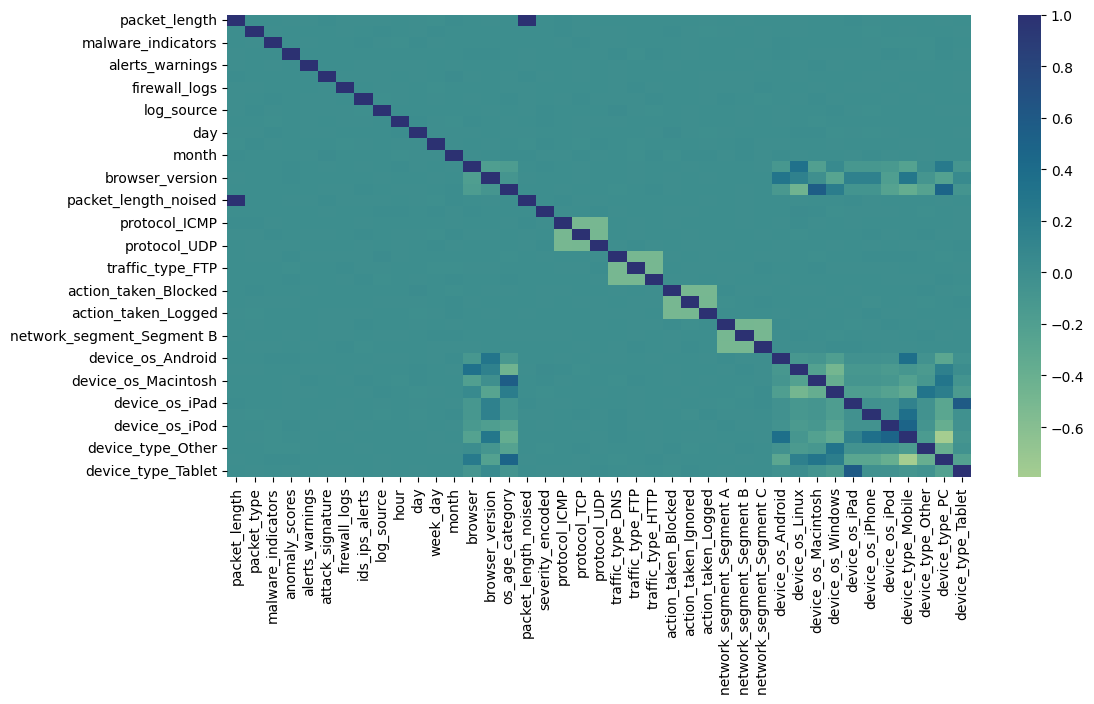

In [410]:
plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.select_dtypes(['int64', 'float64', 'int32']).corr(), cmap="crest", annot=False, fmt='.2f')

In [411]:
# deleting columns
df_encoded = df_encoded.drop(['packet_length', 'os_version'], axis=1)

In [412]:
df_encoded

,source_port,destination_port,packet_type,malware_indicators,anomaly_scores,alerts_warnings,attack_type,attack_signature,firewall_logs,ids_ips_alerts,log_source,hour,day,week_day,month,browser,browser_version,os_age_category,packet_length_noised,severity_encoded,protocol_ICMP,protocol_TCP,protocol_UDP,traffic_type_DNS,traffic_type_FTP,traffic_type_HTTP,action_taken_Blocked,action_taken_Ignored,action_taken_Logged,network_segment_Segment A,network_segment_Segment B,network_segment_Segment C,device_os_Android,device_os_Linux,device_os_Macintosh,device_os_Windows,device_os_iPad,device_os_iPhone,device_os_iPod,device_type_Mobile,device_type_Other,device_type_PC,device_type_Tablet
0,31225,17616,0,1,28.67,0,Malware,0,1,0,0,6,30,1,5,0,9,2,557,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,17245,48166,0,1,51.50,0,Malware,1,1,0,1,7,26,2,8,0,8,2,1186,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,16811,53600,1,1,87.42,1,DDoS,0,1,1,1,8,13,6,11,0,9,2,327,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,20018,32534,0,0,15.79,1,Malware,0,0,1,1,10,2,6,7,0,11,2,452,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,6131,26646,0,0,0.52,1,DDoS,0,0,1,1,13,16,6,7,0,5,2,1408,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,31005,6764,1,1,39.28,0,DDoS,1,1,1,1,14,26,4,5,0,17,0,1437,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
39996,2553,28091,1,1,27.25,0,DDoS,1,1,0,1,0,27,0,3,0,4,1,1188,2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
39997,22505,25152,0,1,31.01,0,DDoS,0,1,1,0,1,31,3,3,0,4,0,1098,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
39998,20013,2703,0,1,97.85,1,Malware,0,1,0,0,18,22,4,9,0,15,0,508,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [416]:
df_encoded.dtypes

source_port                   object
destination_port              object
packet_type                    int64
malware_indicators             int64
anomaly_scores               float64
alerts_warnings                int64
attack_type                   object
attack_signature               int64
firewall_logs                  int64
ids_ips_alerts                 int64
log_source                     int64
hour                           int32
day                            int32
week_day                       int32
month                          int32
browser                        int64
browser_version                Int64
os_age_category                int64
packet_length_noised           int64
severity_encoded               int64
protocol_ICMP                  int64
protocol_TCP                   int64
protocol_UDP                   int64
traffic_type_DNS               int64
traffic_type_FTP               int64
traffic_type_HTTP              int64
action_taken_Blocked           int64
a

In [415]:

# Define new column names
column_mapping = {
    'network_segment_Segment A':'network_segment_Segment_A',
    'network_segment_Segment B':'network_segment_Segment_B',
    'network_segment_Segment C':'network_segment_Segment_C'
}

# Rename columns
df_encoded.rename(columns=column_mapping, inplace=True)

In [417]:
df_encoded.sample(10)

,source_port,destination_port,packet_type,malware_indicators,anomaly_scores,alerts_warnings,attack_type,attack_signature,firewall_logs,ids_ips_alerts,log_source,hour,day,week_day,month,browser,browser_version,os_age_category,packet_length_noised,severity_encoded,protocol_ICMP,protocol_TCP,protocol_UDP,traffic_type_DNS,traffic_type_FTP,traffic_type_HTTP,action_taken_Blocked,action_taken_Ignored,action_taken_Logged,network_segment_Segment_A,network_segment_Segment_B,network_segment_Segment_C,device_os_Android,device_os_Linux,device_os_Macintosh,device_os_Windows,device_os_iPad,device_os_iPhone,device_os_iPod,device_type_Mobile,device_type_Other,device_type_PC,device_type_Tablet
37970,31907,24722,0,0,23.57,0,Intrusion,1,1,0,0,12,23,0,5,0,5,2,1086,2,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2887,4476,47327,0,1,69.82,0,Malware,0,1,1,1,3,14,4,5,0,5,0,202,2,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
36310,17263,15303,1,1,75.88,1,DDoS,0,0,0,1,18,3,5,9,0,8,2,249,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
18871,38039,24346,0,0,92.96,0,Intrusion,1,1,0,0,20,23,1,6,0,3,2,763,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
213,7389,39326,0,0,77.28,1,Intrusion,0,0,1,1,16,25,6,12,0,4,2,935,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
21060,39416,60502,0,0,45.99,0,Intrusion,0,0,0,0,19,2,3,9,0,62,2,819,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
9229,33929,9865,0,1,90.32,0,Malware,1,0,0,0,8,15,4,1,0,24,1,356,2,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
25438,12377,5897,1,0,12.81,0,DDoS,0,0,1,0,23,3,1,10,1,8,0,1400,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
16121,64226,57559,0,1,34.53,1,Malware,1,1,1,1,10,25,5,6,0,9,2,844,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
33439,43986,64718,1,1,34.92,0,DDoS,1,0,0,1,22,29,4,5,0,3,0,1255,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [418]:
df_encoded.to_csv("curated_data.csv", index=False)

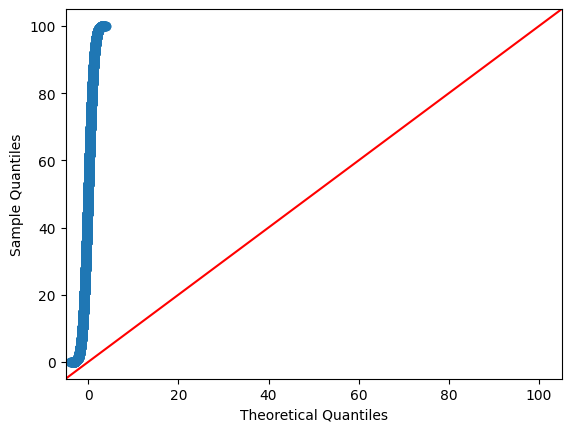

In [422]:
# sn/s.histplot(df_encoded['anomaly_scores'])
import numpy as np
import statsmodels.api as sm
import pylab as py

# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.

# Random data points generated

sm.qqplot(df_encoded['anomaly_scores'], line ='45')
py.show()

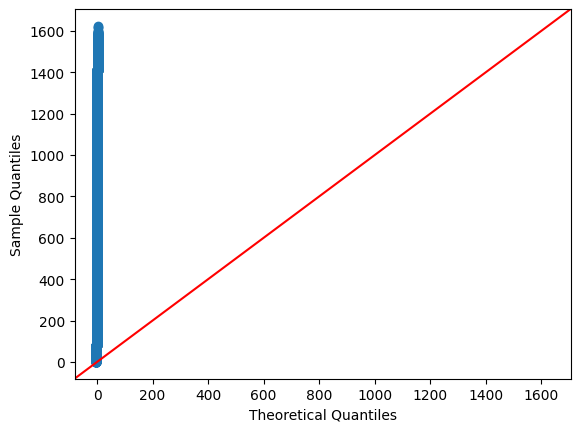

In [423]:
sm.qqplot(df_encoded['packet_length_noised'], line ='45')
py.show()

np.float64(-0.00041014764236280686)

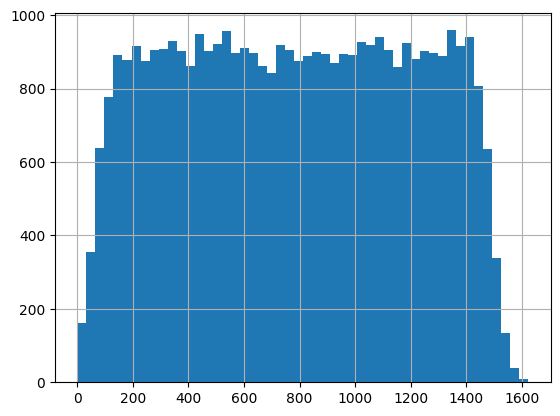

In [431]:
df_encoded['packet_length_noised'].hist(bins=50)
df_encoded['packet_length_noised'].skew()

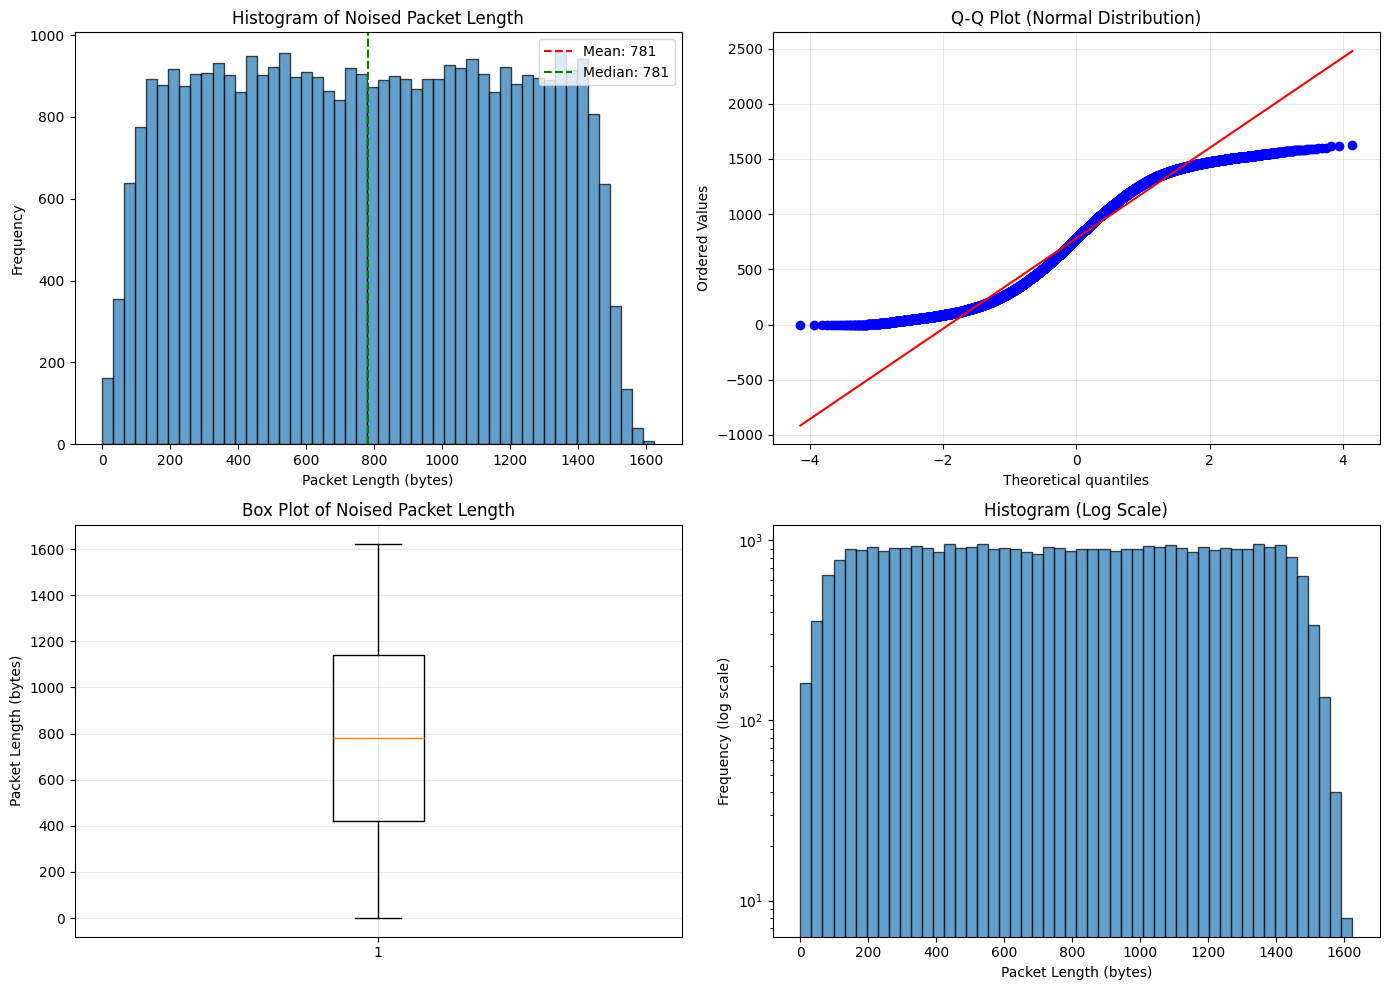

NORMALITY TESTS
Shapiro-Wilk Test (sample of 5000):
  Statistic: 0.960450
  P-value: 0.000000
  ✗ Data is NOT normally distributed (p < 0.05)

Kolmogorov-Smirnov Test:
  Statistic: 0.056895
  P-value: 0.000000
  ✗ Data is NOT normally distributed (p < 0.05)

DESCRIPTIVE STATISTICS
Mean:     781.32 bytes
Median:   781.00 bytes
Std Dev:  418.26 bytes
Min:      0.00 bytes
Max:      1624.00 bytes
Skewness: -0.00
Kurtosis: -1.18

  → Distribution is fairly symmetric


In [429]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# ============================================
# 1. Visualize the actual distribution
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(df_encoded['packet_length_noised'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Histogram of Noised Packet Length')
axes[0, 0].set_xlabel('Packet Length (bytes)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_encoded['packet_length_noised'].mean(), color='red', 
                    linestyle='--', label=f'Mean: {df_encoded["packet_length_noised"].mean():.0f}')
axes[0, 0].axvline(df_encoded['packet_length_noised'].median(), color='green', 
                    linestyle='--', label=f'Median: {df_encoded["packet_length_noised"].median():.0f}')
axes[0, 0].legend()

# Q-Q plot (your current one)
stats.probplot(df_encoded['packet_length_noised'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Normal Distribution)')
axes[0, 1].grid(True, alpha=0.3)

# Box plot
axes[1, 0].boxplot(df_encoded['packet_length_noised'], vert=True)
axes[1, 0].set_title('Box Plot of Noised Packet Length')
axes[1, 0].set_ylabel('Packet Length (bytes)')
axes[1, 0].grid(True, alpha=0.3)

# Log-scale histogram (to see if it's log-normal)
axes[1, 1].hist(df_encoded['packet_length_noised'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Histogram (Log Scale)')
axes[1, 1].set_xlabel('Packet Length (bytes)')
axes[1, 1].set_ylabel('Frequency (log scale)')

plt.tight_layout()
plt.show()

# ============================================
# 2. Statistical tests for normality
# ============================================

print("="*60)
print("NORMALITY TESTS")
print("="*60)

# Shapiro-Wilk test (for normality)
# Note: Use a sample if data is too large (>5000)
if len(df) > 5000:
    sample = df_encoded['packet_length_noised'].sample(5000, random_state=42)
    stat, p_value = stats.shapiro(sample)
    print(f"Shapiro-Wilk Test (sample of 5000):")
else:
    stat, p_value = stats.shapiro(df_encoded['packet_length_noised'])
    print(f"Shapiro-Wilk Test:")

print(f"  Statistic: {stat:.6f}")
print(f"  P-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"  ✗ Data is NOT normally distributed (p < 0.05)")
else:
    print(f"  ✓ Data appears normally distributed (p >= 0.05)")

# Kolmogorov-Smirnov test
stat_ks, p_value_ks = stats.kstest(df_encoded['packet_length_noised'], 'norm',
                                    args=(df_encoded['packet_length_noised'].mean(), 
                                          df_encoded['packet_length_noised'].std()))
print(f"\nKolmogorov-Smirnov Test:")
print(f"  Statistic: {stat_ks:.6f}")
print(f"  P-value: {p_value_ks:.6f}")

if p_value_ks < 0.05:
    print(f"  ✗ Data is NOT normally distributed (p < 0.05)")
else:
    print(f"  ✓ Data appears normally distributed (p >= 0.05)")

# ============================================
# 3. Descriptive statistics
# ============================================

print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)

print(f"Mean:     {df_encoded['packet_length_noised'].mean():.2f} bytes")
print(f"Median:   {df_encoded['packet_length_noised'].median():.2f} bytes")
print(f"Std Dev:  {df_encoded['packet_length_noised'].std():.2f} bytes")
print(f"Min:      {df_encoded['packet_length_noised'].min():.2f} bytes")
print(f"Max:      {df_encoded['packet_length_noised'].max():.2f} bytes")
print(f"Skewness: {df_encoded['packet_length_noised'].skew():.2f}")
print(f"Kurtosis: {df_encoded['packet_length_noised'].kurtosis():.2f}")

# Interpretation
skewness = df_encoded['packet_length_noised'].skew()
if abs(skewness) < 0.5:
    print(f"\n  → Distribution is fairly symmetric")
elif skewness > 0:
    print(f"\n  → Distribution is right-skewed (long tail on right)")
else:
    print(f"\n  → Distribution is left-skewed (long tail on left)")

In [432]:
# Verify it's uniform
import matplotlib.pyplot as plt
from scipy import stats

# Test against uniform distribution
stat, p_value = stats.kstest(
    df_encoded['packet_length_noised'], 
    'uniform',
    args=(df_encoded['packet_length_noised'].min(), 
          df_encoded['packet_length_noised'].max() - df_encoded['packet_length_noised'].min())
)

print("Uniform Distribution Test:")
print(f"  KS Statistic: {stat:.6f}")
print(f"  P-value: {p_value:.6f}")

if p_value > 0.05:
    print("  ✓ Data follows a UNIFORM distribution!")
else:
    print("  ✗ Data does not follow uniform distribution")

Uniform Distribution Test:
  KS Statistic: 0.072196
  P-value: 0.000000
  ✗ Data does not follow uniform distribution


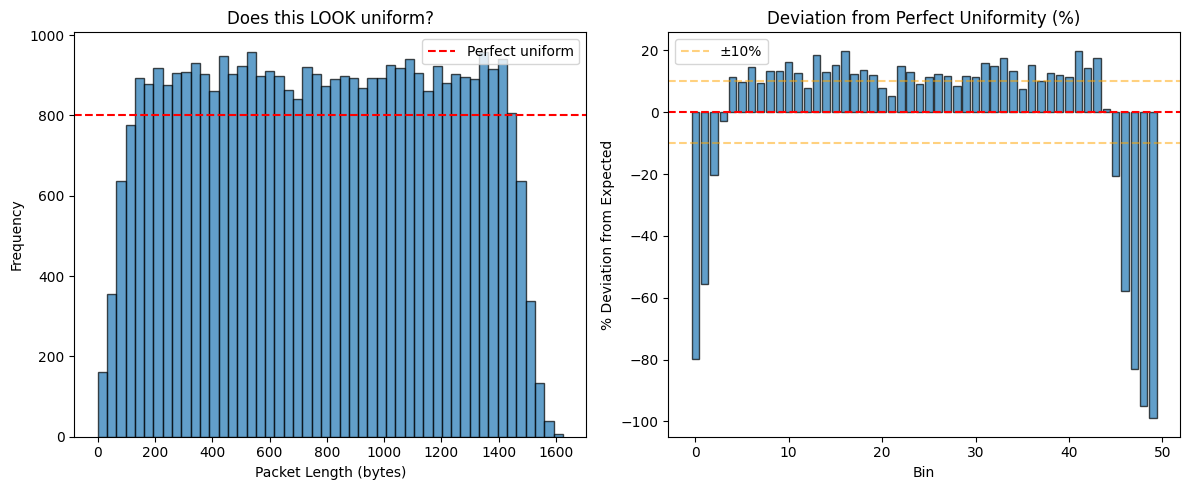


Maximum deviation from perfect uniform: 99.00%
✗ Not uniform (deviations > 20%)


In [433]:
# Check if it's "close enough" to uniform for practical purposes

# Visual inspection
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_encoded['packet_length_noised'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Does this LOOK uniform?')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Frequency')
plt.axhline(y=len(df_encoded)/50, color='red', linestyle='--', label='Perfect uniform')
plt.legend()

plt.subplot(1, 2, 2)
# Compare actual vs expected frequencies
observed, bins = np.histogram(df_encoded['packet_length_noised'], bins=50)
expected = len(df) / 50
deviations = ((observed - expected) / expected) * 100

plt.bar(range(50), deviations, edgecolor='black', alpha=0.7)
plt.title('Deviation from Perfect Uniformity (%)')
plt.xlabel('Bin')
plt.ylabel('% Deviation from Expected')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=10, color='orange', linestyle='--', alpha=0.5, label='±10%')
plt.axhline(y=-10, color='orange', linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

# Summary
max_deviation = np.max(np.abs(deviations))
print(f"\nMaximum deviation from perfect uniform: {max_deviation:.2f}%")

if max_deviation < 10:
    print("✓ Practically uniform (deviations < 10%)")
elif max_deviation < 20:
    print("≈ Approximately uniform (deviations < 20%)")
else:
    print("✗ Not uniform (deviations > 20%)")

DISTRIBUTION FITTING TESTS

1. Uniform Distribution:
   KS Statistic: 0.072196
   P-value: 0.000000
   Result: ✗ Does NOT fit

2. Normal Distribution:
   KS Statistic: 0.056895
   P-value: 0.000000
   Result: ✗ Does NOT fit

3. Exponential Distribution:
   KS Statistic: 0.168379
   P-value: 0.000000
   Result: ✗ Does NOT fit

4. Log-Normal Distribution:
   KS Statistic: 0.121182
   P-value: 0.000000
   Result: ✗ Does NOT fit


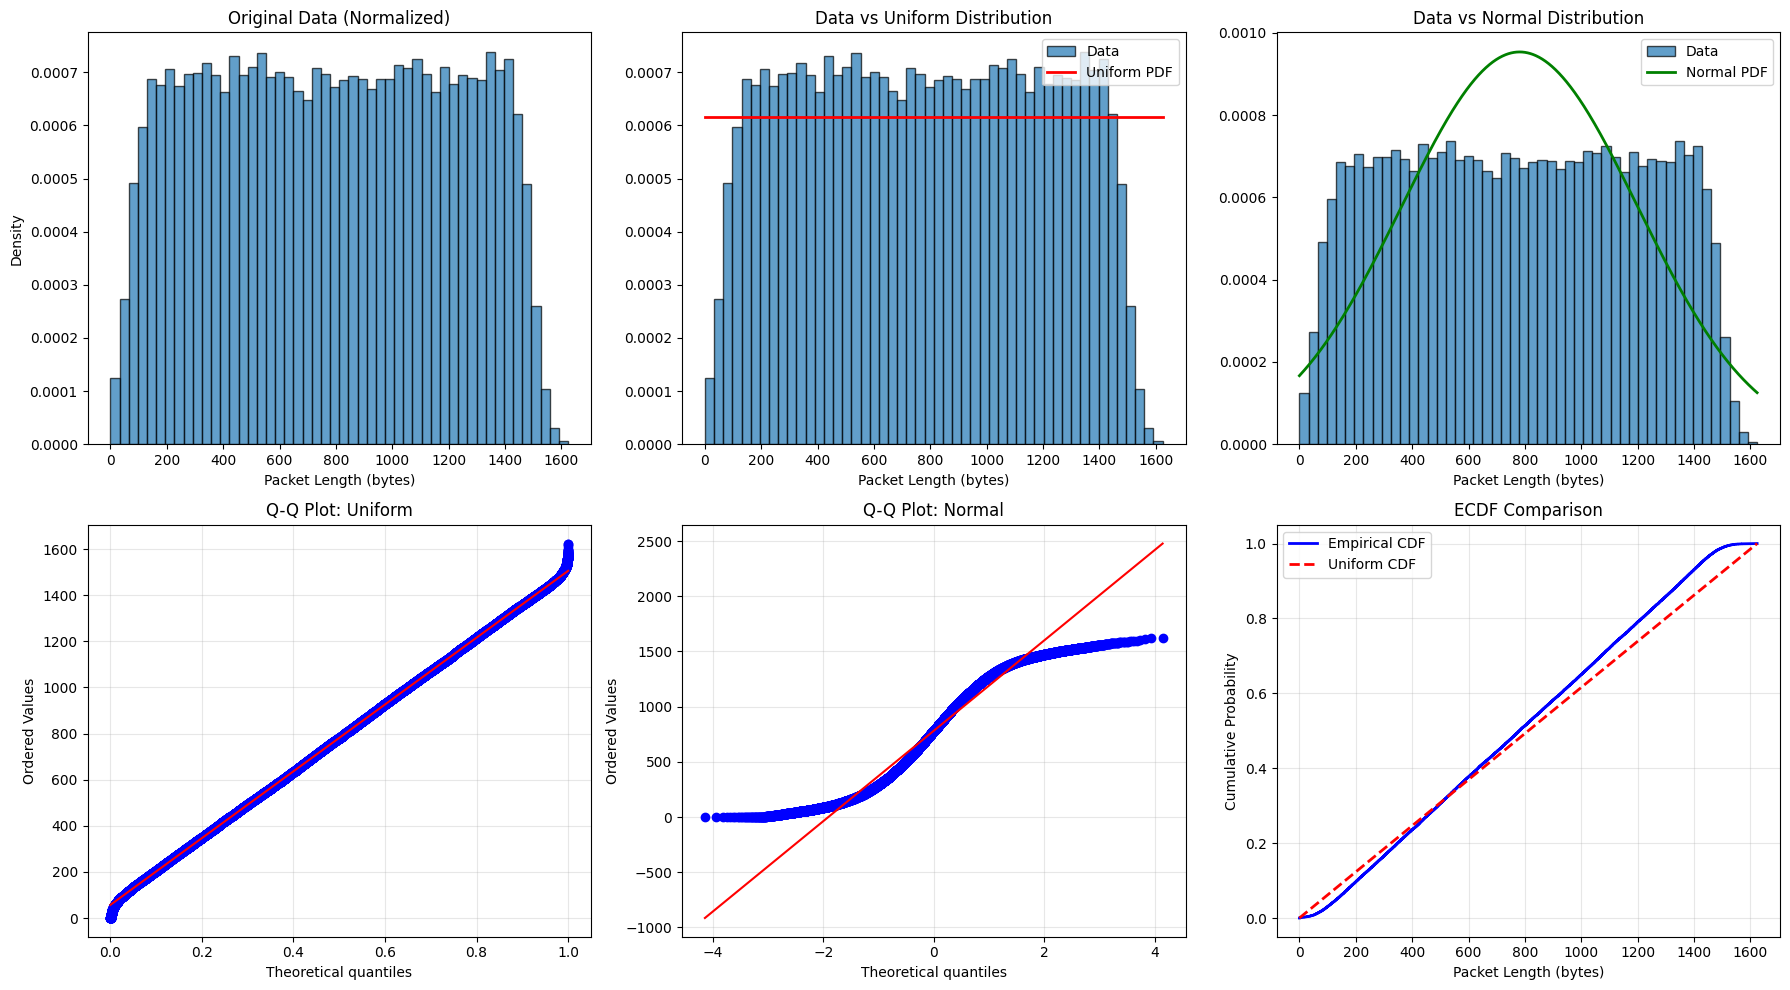


DETAILED STATISTICS

Data Range:
  Min: 0.00
  Max: 1624.00
  Range: 1624.00

Central Tendency:
  Mean: 781.32
  Median: 781.00
  Expected mean (uniform): 812.00
  Difference: 30.68

Spread:
  Std Dev: 418.26
  Expected std (uniform): 468.81
  Difference: 50.55

Shape:
  Skewness: -0.000410
  Expected (uniform): 0.000000
  Kurtosis: -1.184727
  Expected (uniform): -1.200000

CHI-SQUARE GOODNESS OF FIT TEST

Chi-Square Test for Uniformity:
  Chi-square statistic: 3493.1260
  Degrees of freedom: 19
  P-value: 0.000000
  Result: ✗ NOT Uniform

  Expected frequency per bin: 2000.0
  Observed frequencies:
    Bin  1:  803 (-59.85% deviation)
    Bin  2: 2020 ( +1.00% deviation)
    Bin  3: 2234 (+11.70% deviation)
    Bin  4: 2250 (+12.50% deviation)
    Bin  5: 2251 (+12.55% deviation)
    Bin  6: 2295 (+14.75% deviation)
    Bin  7: 2345 (+17.25% deviation)
    Bin  8: 2239 (+11.95% deviation)
    Bin  9: 2165 ( +8.25% deviation)
    Bin 10: 2238 (+11.90% deviation)
    Bin 11: 2250 (+12

In [434]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ============================================
# TEST AGAINST MULTIPLE DISTRIBUTIONS
# ============================================

print("="*60)
print("DISTRIBUTION FITTING TESTS")
print("="*60)

data = df_encoded['packet_length_noised'].dropna()

# Test 1: Uniform Distribution
stat_uniform, p_uniform = stats.kstest(
    data, 
    'uniform',
    args=(data.min(), data.max() - data.min())
)
print(f"\n1. Uniform Distribution:")
print(f"   KS Statistic: {stat_uniform:.6f}")
print(f"   P-value: {p_uniform:.6f}")
print(f"   Result: {'✓ FITS' if p_uniform > 0.05 else '✗ Does NOT fit'}")

# Test 2: Normal Distribution
stat_norm, p_norm = stats.kstest(
    data,
    'norm',
    args=(data.mean(), data.std())
)
print(f"\n2. Normal Distribution:")
print(f"   KS Statistic: {stat_norm:.6f}")
print(f"   P-value: {p_norm:.6f}")
print(f"   Result: {'✓ FITS' if p_norm > 0.05 else '✗ Does NOT fit'}")

# Test 3: Exponential Distribution
stat_expon, p_expon = stats.kstest(
    data,
    'expon',
    args=(data.min(), data.mean() - data.min())
)
print(f"\n3. Exponential Distribution:")
print(f"   KS Statistic: {stat_expon:.6f}")
print(f"   P-value: {p_expon:.6f}")
print(f"   Result: {'✓ FITS' if p_expon > 0.05 else '✗ Does NOT fit'}")

# Test 4: Log-Normal Distribution
# Remove zeros for log-normal test
data_positive = data[data > 0]
if len(data_positive) > 0:
    log_data = np.log(data_positive)
    stat_lognorm, p_lognorm = stats.kstest(
        data_positive,
        'lognorm',
        args=(log_data.std(), 0, np.exp(log_data.mean()))
    )
    print(f"\n4. Log-Normal Distribution:")
    print(f"   KS Statistic: {stat_lognorm:.6f}")
    print(f"   P-value: {p_lognorm:.6f}")
    print(f"   Result: {'✓ FITS' if p_lognorm > 0.05 else '✗ Does NOT fit'}")

# ============================================
# VISUAL COMPARISON WITH FITTED DISTRIBUTIONS
# ============================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Original histogram
axes[0, 0].hist(data, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Original Data (Normalized)')
axes[0, 0].set_xlabel('Packet Length (bytes)')
axes[0, 0].set_ylabel('Density')

# Overlay uniform distribution
x_range = np.linspace(data.min(), data.max(), 1000)
uniform_pdf = stats.uniform.pdf(x_range, data.min(), data.max() - data.min())
axes[0, 1].hist(data, bins=50, density=True, alpha=0.7, edgecolor='black', label='Data')
axes[0, 1].plot(x_range, uniform_pdf, 'r-', linewidth=2, label='Uniform PDF')
axes[0, 1].set_title('Data vs Uniform Distribution')
axes[0, 1].set_xlabel('Packet Length (bytes)')
axes[0, 1].legend()

# Overlay normal distribution
normal_pdf = stats.norm.pdf(x_range, data.mean(), data.std())
axes[0, 2].hist(data, bins=50, density=True, alpha=0.7, edgecolor='black', label='Data')
axes[0, 2].plot(x_range, normal_pdf, 'g-', linewidth=2, label='Normal PDF')
axes[0, 2].set_title('Data vs Normal Distribution')
axes[0, 2].set_xlabel('Packet Length (bytes)')
axes[0, 2].legend()

# Q-Q plots
stats.probplot(data, dist='uniform', plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Uniform')
axes[1, 0].grid(True, alpha=0.3)

stats.probplot(data, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Normal')
axes[1, 1].grid(True, alpha=0.3)

# ECDF comparison
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
theoretical_uniform = (sorted_data - data.min()) / (data.max() - data.min())

axes[1, 2].plot(sorted_data, ecdf, 'b-', linewidth=2, label='Empirical CDF')
axes[1, 2].plot(sorted_data, theoretical_uniform, 'r--', linewidth=2, label='Uniform CDF')
axes[1, 2].set_title('ECDF Comparison')
axes[1, 2].set_xlabel('Packet Length (bytes)')
axes[1, 2].set_ylabel('Cumulative Probability')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# DETAILED STATISTICS
# ============================================

print("\n" + "="*60)
print("DETAILED STATISTICS")
print("="*60)

# Check for deviations from uniformity
print(f"\nData Range:")
print(f"  Min: {data.min():.2f}")
print(f"  Max: {data.max():.2f}")
print(f"  Range: {data.max() - data.min():.2f}")

print(f"\nCentral Tendency:")
print(f"  Mean: {data.mean():.2f}")
print(f"  Median: {data.median():.2f}")
print(f"  Expected mean (uniform): {(data.min() + data.max())/2:.2f}")
print(f"  Difference: {abs(data.mean() - (data.min() + data.max())/2):.2f}")

print(f"\nSpread:")
print(f"  Std Dev: {data.std():.2f}")
print(f"  Expected std (uniform): {(data.max() - data.min())/np.sqrt(12):.2f}")
print(f"  Difference: {abs(data.std() - (data.max() - data.min())/np.sqrt(12)):.2f}")

print(f"\nShape:")
print(f"  Skewness: {data.skew():.6f}")
print(f"  Expected (uniform): 0.000000")
print(f"  Kurtosis: {data.kurtosis():.6f}")
print(f"  Expected (uniform): -1.200000")

# ============================================
# CHI-SQUARE TEST FOR UNIFORMITY
# ============================================

print("\n" + "="*60)
print("CHI-SQUARE GOODNESS OF FIT TEST")
print("="*60)

# Create bins
n_bins = 20
observed_freq, bin_edges = np.histogram(data, bins=n_bins)
expected_freq = len(data) / n_bins

# Chi-square test
chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
p_value_chi2 = 1 - stats.chi2.cdf(chi2_stat, df=n_bins-1)

print(f"\nChi-Square Test for Uniformity:")
print(f"  Chi-square statistic: {chi2_stat:.4f}")
print(f"  Degrees of freedom: {n_bins-1}")
print(f"  P-value: {p_value_chi2:.6f}")
print(f"  Result: {'✓ Uniform' if p_value_chi2 > 0.05 else '✗ NOT Uniform'}")

# Show bin frequencies
print(f"\n  Expected frequency per bin: {expected_freq:.1f}")
print(f"  Observed frequencies:")
for i, freq in enumerate(observed_freq):
    deviation = ((freq - expected_freq) / expected_freq) * 100
    print(f"    Bin {i+1:2d}: {freq:4d} ({deviation:+6.2f}% deviation)")

# ============================================
# IDENTIFY WHAT IT ACTUALLY IS
# ============================================

print("\n" + "="*60)
print("DISTRIBUTION IDENTIFICATION")
print("="*60)

# Check for peaks/modes
from scipy.signal import find_peaks

hist, bin_centers = np.histogram(data, bins=50)
bin_centers = (bin_centers[:-1] + bin_centers[1:]) / 2
peaks, _ = find_peaks(hist, height=hist.mean())

print(f"\nNumber of modes detected: {len(peaks)}")
if len(peaks) == 0:
    print("  → Distribution appears relatively flat")
elif len(peaks) == 1:
    print(f"  → Unimodal distribution")
    print(f"  → Peak at approximately {bin_centers[peaks[0]]:.0f} bytes")
elif len(peaks) == 2:
    print(f"  → Bimodal distribution")
    print(f"  → Peaks at approximately {bin_centers[peaks[0]]:.0f} and {bin_centers[peaks[1]]:.0f} bytes")
else:
    print(f"  → Multimodal distribution")
    print(f"  → Peaks at: {', '.join([f'{bin_centers[p]:.0f}' for p in peaks])} bytes")

# ============================================
# CONCLUSION
# ============================================

print("\n" + "="*60)
print("CONCLUSION")
print("="*60)

if p_value_chi2 > 0.05 and abs(data.skew()) < 0.1 and abs(data.kurtosis() + 1.2) < 0.2:
    print("\n✓ Distribution is APPROXIMATELY UNIFORM")
    print("  Small deviations are due to:")
    print("  - Noise addition")
    print("  - Finite sample size")
    print("  - Random sampling effects")
else:
    print("\n✗ Distribution is NOT UNIFORM")
    print("  Possible explanations:")
    if abs(data.kurtosis() + 1.2) > 0.5:
        print(f"  - Kurtosis ({data.kurtosis():.2f}) differs from uniform (-1.2)")
    if abs(data.skew()) > 0.1:
        print(f"  - Skewness ({data.skew():.2f}) differs from uniform (0.0)")
    if p_value_chi2 < 0.001:
        print(f"  - Chi-square test strongly rejects uniformity (p={p_value_chi2:.6f})")
    print("\n  Your distribution is closer to:")
    
    # Find best fit
    tests = {
        'Uniform': p_uniform,
        'Normal': p_norm,
        'Exponential': p_expon,
    }
    best_fit = max(tests, key=tests.get)
    print(f"  → {best_fit} distribution (p={tests[best_fit]:.6f})")
    
    if tests[best_fit] < 0.05:
        print("\n  However, NO standard distribution fits well!")
        print("  Your data may be:")
        print("  - A mixture of distributions")
        print("  - Discretized/truncated")
        print("  - Have specific constraints from data generation")

In [435]:
df_encoded.columns

Index(['source_port', 'destination_port', 'packet_type', 'malware_indicators',
       'anomaly_scores', 'alerts_warnings', 'attack_type', 'attack_signature',
       'firewall_logs', 'ids_ips_alerts', 'log_source', 'hour', 'day',
       'week_day', 'month', 'browser', 'browser_version', 'os_age_category',
       'packet_length_noised', 'severity_encoded', 'protocol_ICMP',
       'protocol_TCP', 'protocol_UDP', 'traffic_type_DNS', 'traffic_type_FTP',
       'traffic_type_HTTP', 'action_taken_Blocked', 'action_taken_Ignored',
       'action_taken_Logged', 'network_segment_Segment_A',
       'network_segment_Segment_B', 'network_segment_Segment_C',
       'device_os_Android', 'device_os_Linux', 'device_os_Macintosh',
       'device_os_Windows', 'device_os_iPad', 'device_os_iPhone',
       'device_os_iPod', 'device_type_Mobile', 'device_type_Other',
       'device_type_PC', 'device_type_Tablet'],
      dtype='object')

In [438]:
df_encoded

,source_port,destination_port,packet_type,malware_indicators,anomaly_scores,alerts_warnings,attack_type,attack_signature,firewall_logs,ids_ips_alerts,log_source,hour,day,week_day,month,browser,browser_version,os_age_category,packet_length_noised,severity_encoded,protocol_ICMP,protocol_TCP,protocol_UDP,traffic_type_DNS,traffic_type_FTP,traffic_type_HTTP,action_taken_Blocked,action_taken_Ignored,action_taken_Logged,network_segment_Segment_A,network_segment_Segment_B,network_segment_Segment_C,device_os_Android,device_os_Linux,device_os_Macintosh,device_os_Windows,device_os_iPad,device_os_iPhone,device_os_iPod,device_type_Mobile,device_type_Other,device_type_PC,device_type_Tablet
0,31225,17616,0,1,28.67,0,Malware,0,1,0,0,6,30,1,5,0,9,2,557,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,17245,48166,0,1,51.50,0,Malware,1,1,0,1,7,26,2,8,0,8,2,1186,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,16811,53600,1,1,87.42,1,DDoS,0,1,1,1,8,13,6,11,0,9,2,327,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,20018,32534,0,0,15.79,1,Malware,0,0,1,1,10,2,6,7,0,11,2,452,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,6131,26646,0,0,0.52,1,DDoS,0,0,1,1,13,16,6,7,0,5,2,1408,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,31005,6764,1,1,39.28,0,DDoS,1,1,1,1,14,26,4,5,0,17,0,1437,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
39996,2553,28091,1,1,27.25,0,DDoS,1,1,0,1,0,27,0,3,0,4,1,1188,2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
39997,22505,25152,0,1,31.01,0,DDoS,0,1,1,0,1,31,3,3,0,4,0,1098,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
39998,20013,2703,0,1,97.85,1,Malware,0,1,0,0,18,22,4,9,0,15,0,508,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


<Axes: xlabel='anomaly_scores', ylabel='Density'>

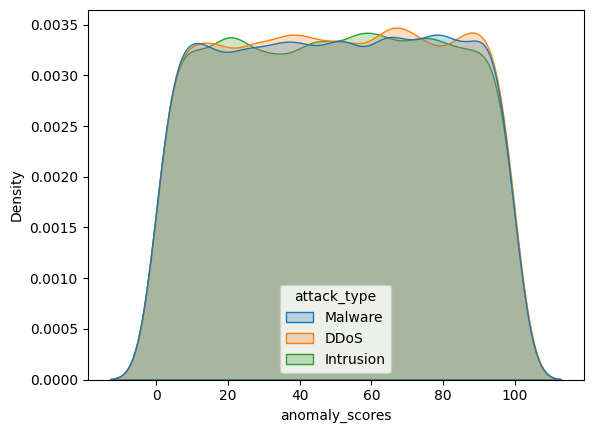

In [440]:
import seaborn as sns
sns.kdeplot(data=df_encoded, x='anomaly_scores', hue='attack_type', fill=True)

In [443]:
!pip install -U scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 47.4 MB/s  0:00:00 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [445]:
from sklearn.feature_selection import mutual_info_classif

X = df_encoded[['packet_length_noised']]
y = df_encoded['attack_type']

mi = mutual_info_classif(X, y)
print(mi)


[0]
